In [1]:
from Utils import *
from Datahandler import DataLoader, DataSet
from Bucket import Bucket

In [2]:
DIR_PATH = 'Z:\Stock\L1_tick\JQ' 

PERIOD_START = '2020-01-01'
PERIOD_END = '2022-07-08'
CSI500 = index_components('S.CN.SSE.000905', PERIOD_START, PERIOD_END)
CSI500 = np.unique(CSI500)

### History Components of CST500

In [3]:
history_contains = []
for contains in CSI500:
    history_contains += contains
history_contains = np.unique(history_contains)

print('[', len(history_contains), f'] stocks have been contained in CSI500 duiring {PERIOD_START} -- {PERIOD_END}') # Find all stocks ever contained in CST500
print('CST500 components have changed [', len(CSI500), '] times') # Contains of CSI500 have changed 9 times during the period

files = []
for file in os.listdir(DIR_PATH):
    NO = file[:6]
    SYMBOL = 'S.CN.SZSE.' + NO if file[7:11] == 'XSHE' else 'S.CN.SSE.' + NO
    if SYMBOL in history_contains:
        files.append(file)

print(f'local dataset has [ {len(files)}/{len(history_contains)} ] stocks data') # all stocks contained in the CSI500 during the period.

[ 728 ] stocks have been contained in CSI500 duiring 2020-01-01 -- 2022-07-08
CST500 components have changed [ 9 ] times
local dataset has [ 728/728 ] stocks data


### Single Stock Features & Volatility

In [4]:
SYMBOL = '689009_XSHG'
BUCKET_SIZE = datetime.timedelta(minutes = 9, seconds = 59) # 60 * 10 entries
TRAIN_TEST_SIZE = 31 # total days for training and testing

In [5]:
FEATURES = ['F1_1', 'F1_2', 'F1_3', 'F1_4',                                                     \
                                                                                                \
            'F2_1', 'F2_2', 'F2_3', 'F2_4', 'F2_5', 'F2_6', 'F2_7', 'F2_8', 'F2_9',             \
            'F2_10', 'F2_11', 'F2_12', 'F2_13', 'F2_14', 'F2_15', 'F2_16', 'F2_17',             \
                                                                                                \
            'F3_1', 'F3_2', 'F3_3', 'F3_4', 'F3_5', 'F3_6',                                     \
                                                                                                \
            'F4_1', 'F4_2', 'F4_3', 'F4_4',                                                     \
                                                                                                \
            'F5_1', 'F5_2', 'F5_3', 'F5_4',                                                     \
                                                                                                \
            'F6_1', 'F6_2', 'F6_3', 'F6_4', 'F6_5', 'F6_6', 'F6_7', 'F6_8', 'F6_9',             \
            'F6_10', 'F6_11', 'F6_12', 'F6_13', 'F6_14', 'F6_15', 'F6_16',                      \
                                                                                                \
            'F7_1', 'F7_2', 'F7_3', 'F7_4', 'F7_5', 'F7_6', 'F7_7', 'F7_8'] # total 59 basic features

In [6]:
file_path = DIR_PATH + '\\'+ SYMBOL + '.h5'
hdf = pd.HDFStore(file_path, 'r')
Valid_Trading_Dates = pd.Series(hdf.keys()).apply(lambda x: x[1:])

Rolling_Period = list(Valid_Trading_Dates.rolling(TRAIN_TEST_SIZE))[-1].to_list() # 1 for test others for training

In [25]:
Rolling_Period[-3]

'2022-07-06'

In [7]:
with timer('- Get Train Set Total Time -'):
    train_set = DataSet(Rolling_Period[:-3], SYMBOL, DIR_PATH, BUCKET_SIZE)
    train_set.get_dataset()
    train_set.dataset_shuffle()
    train_df = train_set.get_items()

print('\n')

with timer('- Get Test Set Total time -'):
    test_set = DataSet(Rolling_Period[-3:], SYMBOL, DIR_PATH, BUCKET_SIZE)
    test_set.get_dataset()
    test_df = test_set.get_items()

[Load Data]  0.049 seconds
[Data Expansion]  0.163 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.029 seconds
[Data Expansion]  0.077 seconds
[Features Computation 0]  0.006 seconds
[Load Data]  0.030 seconds
[Data Expansion]  0.076 seconds
[Features Computation 0]  0.006 seconds
[Load Data]  0.029 seconds
[Data Expansion]  0.076 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.031 seconds
[Data Expansion]  0.162 seconds
[Features Computation 0]  0.006 seconds
[Load Data]  0.031 seconds
[Data Expansion]  0.077 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.042 seconds
[Data Expansion]  0.077 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.030 seconds
[Data Expansion]  0.077 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.030 seconds
[Data Expansion]  0.162 seconds
[Features Computation 0]  0.007 seconds
[Load Data]  0.030 seconds
[Data Expansion]  0.078 seconds
[Features Computation 0]  0.007 seconds
[Load Data

In [9]:
train_df['baseline']

2022-06-07 13:22:34    0.031876
2022-06-24 10:43:35    0.007743
2022-07-05 13:21:56    0.012358
2022-05-30 09:31:39    0.035495
2022-06-02 10:50:23    0.006506
                         ...   
2022-07-04 11:06:11    0.006037
2022-06-28 11:23:39    0.008507
2022-06-10 10:39:29    0.016617
2022-06-07 10:21:03    0.014522
2022-06-23 11:17:30    0.007403
Name: baseline, Length: 352800, dtype: float64

In [32]:
test_df['target']

2022-07-08 09:30:00    0.006863
2022-07-08 09:30:01    0.006863
2022-07-08 09:30:02    0.006863
2022-07-08 09:30:03    0.006863
2022-07-08 09:30:04    0.006863
                         ...   
2022-07-08 14:29:55    0.003150
2022-07-08 14:29:56    0.003150
2022-07-08 14:29:57    0.003150
2022-07-08 14:29:58    0.003150
2022-07-08 14:29:59    0.003150
Name: target, Length: 12600, dtype: float64

### LGBM Regressor

In [10]:
def rmse(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred)))))

def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))

def feval_RMSPE(preds, train_data):
    labels = train_data.get_label()
    return 'RMSPE', round(rmspe(y_true = labels, y_pred = preds),5), False

In [11]:
class EnsembleModel:
    def __init__(self, models: List[lgb.Booster], weights: Optional[List[float]] = None):
        self.models = models
        self.weights = weights

        features = list(self.models[0].feature_name())

        for m in self.models[1:]:
            assert features == list(m.feature_name())

    def predict(self, x):
        predicted = np.zeros((len(x), len(self.models)))

        for i, m in enumerate(self.models):
            w = self.weights[i] if self.weights is not None else 1
            predicted[:, i] = w * m.predict(x)

        ttl = np.sum(self.weights) if self.weights is not None else len(self.models)
        return np.sum(predicted, axis=1) / ttl

    def feature_name(self) -> List[str]:
        return self.models[0].feature_name()

In [12]:
lr = 0.3
params = {
    'objective': 'regression',
    'verbose': -1,
    'metric': 'l2_root',
    'reg_alpha': 5,
    'reg_lambda': 5,
    'min_data_in_leaf': 1000,
    'max_depth': -1,
    'num_leaves': 2**6,
    'colsample_bytree': 0.7,
    'learning_rate': lr,
}

ds = lgb.Dataset(data = train_df[FEATURES], label = train_df['target'], feature_name = FEATURES)

In [13]:
folds = []
kf = KFold(n_splits=10)
tmp_folds = kf.split(train_df)
for train_index, valid_index in tmp_folds:
    folds.append((train_index, valid_index))

with timer('lgb.cv'):
    ret = lgb.cv(params, ds, num_boost_round=500, folds=folds, #cv,
                    feval=feval_RMSPE, stratified=False, 
                    return_cvbooster=True, verbose_eval=20,
                    )
    print(f"# overall RMSPE: {ret['RMSPE-mean'][-1]}")

[20]	cv_agg's rmse: 0.000925865 + 1.4366e-05	cv_agg's RMSPE: 0.296102 + 0.00862817
[40]	cv_agg's rmse: 0.000715341 + 2.66936e-05	cv_agg's RMSPE: 0.228359 + 0.0153351
[60]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[80]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[100]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[120]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[140]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[160]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[180]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[200]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[220]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153858
[240]	cv_agg's rmse: 0.000715239 + 2.67964e-05	cv_agg's RMSPE: 0.228257 + 0.0153

In [14]:
best_iteration = len(ret['RMSPE-mean'])
for i in range(10):
    y_pred = ret['cvbooster'].boosters[i].predict(train_df[FEATURES].iloc[folds[i][1]], num_iteration=best_iteration)
    y_true = train_df['target'].iloc[folds[i][1]]
    print(f"# fold{i} RMSPE: {rmspe(y_true, y_pred)}")
    
    if i == len(folds) - 1:
        np.save('pred_gbdt.npy', y_pred)

# fold0 RMSPE: 0.25201456389387256
# fold1 RMSPE: 0.23168768090857894
# fold2 RMSPE: 0.22502600022154773
# fold3 RMSPE: 0.22015767818498716
# fold4 RMSPE: 0.21534814252718656
# fold5 RMSPE: 0.2513272887144692
# fold6 RMSPE: 0.2439307978491211
# fold7 RMSPE: 0.20369029975850728
# fold8 RMSPE: 0.21650116288873733
# fold9 RMSPE: 0.22287853263417312


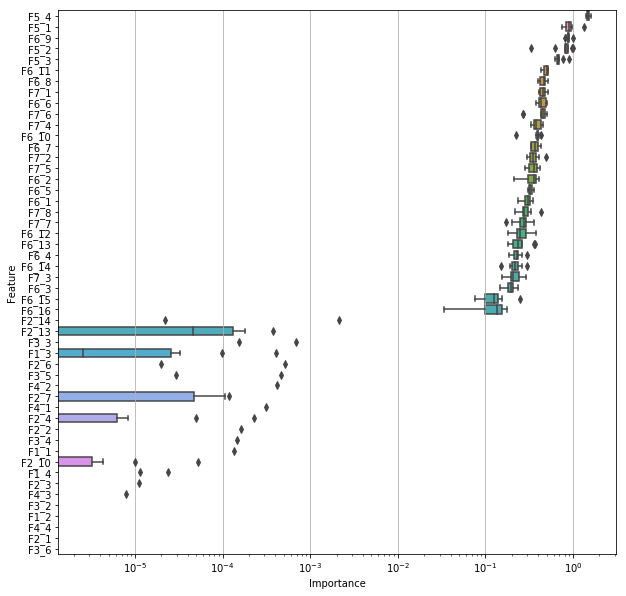

In [15]:
plot_importance(ret['cvbooster'], FEATURES)

In [17]:
GBDT_NUM_MODELS = 5

In [18]:
boosters = []
with timer('retraining'):
    for i in range(GBDT_NUM_MODELS):
        params['seed'] = i
        boosters.append(lgb.train(params, ds, num_boost_round=int(1.1*best_iteration)))

booster = EnsembleModel(boosters)

[retraining]  9.207 seconds


In [22]:
CC = booster.predict(test_df[FEATURES])
print('RMSPE: ', rmspe(CC, test_df['target']))
print('RMSE:', rmse(CC, test_df['target']))

print('Baseline_RMSPE: ', rmspe(test_df['baseline'], test_df['target']))
print('Baseline_RMSE:', rmse(test_df['baseline'], test_df['target']))

RMSPE:  0.49168514289700616
RMSE: 0.003835275203970813
Baseline_RMSPE:  0.5432508703908966
Baseline_RMSE: 0.004520146219221657
